## Evaluating HPO Space of SVD++ algorithm

This notebook contains evaluation of RMSE of SVD++ models at Movielens datasets
using different numbers of factors and regularization constants.

Initial setup: imports and working dir

In [1]:
import os
while not os.path.exists('.gitmodules'):
    os.chdir('..')

from typing import Dict

import matplotlib.pyplot as plt
import pandas as pd

from parameters import get_env_parameters
from util.hpo_space_eval_utils import eval_svdpp_hpo_space, visualize_hpo_space
from util.datasets import MOVIELENS_100K, MOVIELENS_1M, MOVIELENS_10M
from util.docker.eigen3_svd import Eigen3SVDService

Start the docker container for native SVD/SVD++ models.
*If either the container or needed image does not exist, they will be created programmatically.*
This behavior is controlled by service constructor flags.

In [2]:
env_params = get_env_parameters()
eigen3_svd_service = Eigen3SVDService(env_params=env_params,
                                      do_init_container=True,
                                      allow_auto_build_image=True,
                                      allow_auto_create_container=True,
                                      allow_auto_run_container=True)

Define experiment settings: hyperparameter values to evaluate for needed datasets.

In [3]:
eval_params_map = {
    MOVIELENS_100K.id: {
        'n_factors_list': [(i + 1) * 10 for i in range(10)],
        'reg_weight_list': [round((i + 1) * 0.01, 2) for i in range(10)]
    },
    MOVIELENS_1M.id: {
        'n_factors_list': [(i + 1) * 10 for i in range(10)],
        'reg_weight_list': [round((i + 1) * 0.01, 2) for i in range(10)]
    },
    MOVIELENS_10M.id: {
        'n_factors_list': [(i + 1) * 10 for i in range(10)],
        'reg_weight_list': [round((i + 1) * 0.01, 2) for i in range(10)]
    }
}

Define map with existing experiment results.
This allows taking previous RMSE evaluations from disk without running model pipeline.

In [4]:
existing_results_files_map = {
    MOVIELENS_100K.id: [
        'ml100k-svdpp-f10-100-regw0.01-0.1.csv'
    ],
    MOVIELENS_1M.id: [
        'ml1m-svdpp-f10-100-regw0.01-0.1.csv'
    ],
    MOVIELENS_10M.id: [
        'ml10m-svdpp-f10-100-regw0.01-0.1.csv'
    ]
}

Run the experiments.
Function ```eval_svd_hpo_space``` returns ```pd.DataFrame``` and saves CSV results file on disk.

In [5]:
results_map: Dict[str, pd.DataFrame] = dict()
for dd in [MOVIELENS_100K, MOVIELENS_1M, MOVIELENS_10M]:
    results_map[dd.id] = eval_svdpp_hpo_space(
        eval_params_map=eval_params_map,
        existing_results_files_map=existing_results_files_map,
        dataset_descriptor=dd,
        eigen3_svd_service=eigen3_svd_service
    )


Executable for factor count: 10 already exists, skipped
Executable for factor count: 20 already exists, skipped
Executable for factor count: 30 already exists, skipped
Executable for factor count: 40 already exists, skipped
Executable for factor count: 50 already exists, skipped
Executable for factor count: 60 already exists, skipped
Executable for factor count: 70 already exists, skipped
Executable for factor count: 80 already exists, skipped
Executable for factor count: 90 already exists, skipped
Executable for factor count: 100 already exists, skipped
Pre-compilation finished
C:\_\svd-pytorch-and-bo\eigen3_svd\data\corpus\ml100k-train-80.csv and C:\_\svd-pytorch-and-bo\eigen3_svd\data\corpus\ml100k-test-20.csv already exists
Splitting finished
Models with n_factors=10 are evaluated
Models with n_factors=20 are evaluated
Models with n_factors=30 are evaluated
Models with n_factors=40 are evaluated
Models with n_factors=50 are evaluated
Models with n_factors=60 are evaluated
Models wi

Visualize model loss on given hyperparameter configuration space.

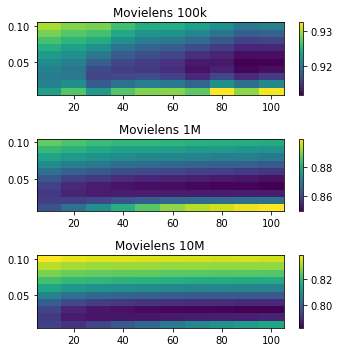

In [6]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(5, 5), facecolor='white')
for i, dd in enumerate([MOVIELENS_100K, MOVIELENS_1M, MOVIELENS_10M]):
    visualize_hpo_space(results_map[dd.id], fig, ax[i])
    ax[i].set_title(dd.name)

fig.tight_layout()